## Import the required libraries

In [1]:
import numpy as np 
print(np.__version__)

1.26.1


In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from tensorflow.keras.layers import Flatten, Dropout, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.utils import plot_model

from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score,roc_curve, f1_score, auc

In [3]:
x = np.load('x_balanced.npy')
# y = np.load('y_balanced.npy')

In [7]:
y = np.load('y_balanced.npy', allow_pickle=True)

In [8]:
x.shape, y.shape

((109000, 78), (109000,))

## Standardize and train text split the dataset

In [38]:
x_scaled = StandardScaler().fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42, stratify=y)

print('===========x_train=============', x_train.shape)
print('===========x_test==============', x_test.shape)

===========x_train============= (87200, 78)
===========x_test============== (21800, 78)


In [46]:
labels=np.unique(y_train)

classes = []
for i in range(0,len(labels)): 
    classes.append(i)

map=dict(zip(labels,classes))
print(map)

y_train_class=[]
for i in range(0, len(y_train)):
    y_train_class.append(map[y_train[i]])
y_train=np.asarray(y_train_class)


'''Test sample processing'''

y_test_class=[]
for i in range(0, len(y_test)):
    y_test_class.append(map[y_test[i]])    
y_test=np.asarray(y_test_class)

{'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'DoS GoldenEye': 3, 'DoS Hulk': 4, 'DoS Slowhttptest': 5, 'DoS slowloris': 6, 'FTP-Patator': 7, 'Heartbleed': 8, 'Infiltration': 9, 'PortScan': 10, 'SSH-Patator': 11, 'Web Attack � Brute Force': 12, 'Web Attack � Sql Injection': 13, 'Web Attack � XSS': 14}


In [47]:
y_test

array([ 5,  1, 10, ...,  2,  1,  3])

In [48]:
def show_result(y_true,y_pred):
    """Outputs a classification report and error matrix"""
    print(classification_report(y_true,y_pred))
    plt.figure(figsize = (10,8))
    sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot = True, fmt = 'd', cmap='crest')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [49]:
input_layer = Input(shape=(78,))

layer1 = Dense(256, activation='relu')(input_layer)
layer2 = Dropout(0.2)(layer1)
layer3 = Dense(64)(layer2) 
layer4 = Dropout(0.2)(layer3)
layer5 = Dense(32, activation='relu')(layer4)

output_layer = Dense(15, activation='softmax')(layer5)
model = Model(inputs=input_layer, outputs=output_layer) 

model.compile(optimizer=Adam(learning_rate=0.0006),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

class_weights = compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train) 
class_weights = dict(zip(np.unique(y_train), class_weights))

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=100)

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

Epoch 1/50


2023-10-31 14:43:24.517133: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27206400 exceeds 10% of free system memory.


872/872 [==============================] - 6s 6ms/step - loss: 0.5138 - accuracy: 0.8517 - val_loss: 0.2158 - val_accuracy: 0.9296
Epoch 2/50
872/872 [==============================] - 4s 5ms/step - loss: 0.2386 - accuracy: 0.9264 - val_loss: 0.1816 - val_accuracy: 0.9381
Epoch 3/50
872/872 [==============================] - 5s 5ms/step - loss: 0.2066 - accuracy: 0.9348 - val_loss: 0.1657 - val_accuracy: 0.9439
Epoch 4/50
872/872 [==============================] - 4s 5ms/step - loss: 0.1877 - accuracy: 0.9399 - val_loss: 0.1528 - val_accuracy: 0.9492
Epoch 5/50
872/872 [==============================] - 4s 5ms/step - loss: 0.1765 - accuracy: 0.9427 - val_loss: 0.1456 - val_accuracy: 0.9511
Epoch 6/50
872/872 [==============================] - 5s 5ms/step - loss: 0.1695 - accuracy: 0.9455 - val_loss: 0.1440 - val_accuracy: 0.9511
Epoch 7/50
872/872 [==============================] - 5s 5ms/step - loss: 0.1608 - accuracy: 0.9470 - val_loss: 0.1397 - val_accuracy: 0.9527
Epoch 8/50
872/87

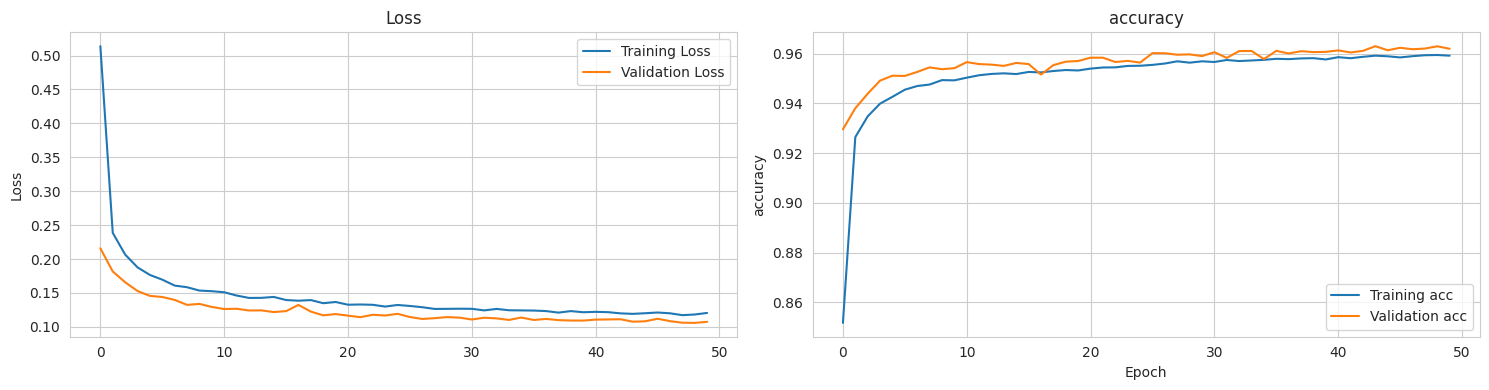

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(acc, label='Training acc')
plt.plot(val_acc, label='Validation acc')
plt.legend()
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')

plt.tight_layout()
plt.show()

682/682 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3000
           1       0.94      1.00      0.97      1000
           2       0.99      1.00      1.00      1600
           3       1.00      1.00      1.00      2200
           4       0.97      1.00      0.99      1600
           5       0.99      0.99      0.99      2000
           6       0.99      0.99      0.99      2000
           7       1.00      0.99      1.00      2200
           8       1.00      1.00      1.00       400
           9       0.99      0.99      0.99       400
          10       0.97      1.00      0.98      1600
          11       0.91      0.99      0.95      2000
          12       0.71      0.95      0.81      1000
          13       0.97      0.62      0.76       400
          14       0.75      0.01      0.03       400

    accuracy                           0.96     21800
   macro avg       0.94  

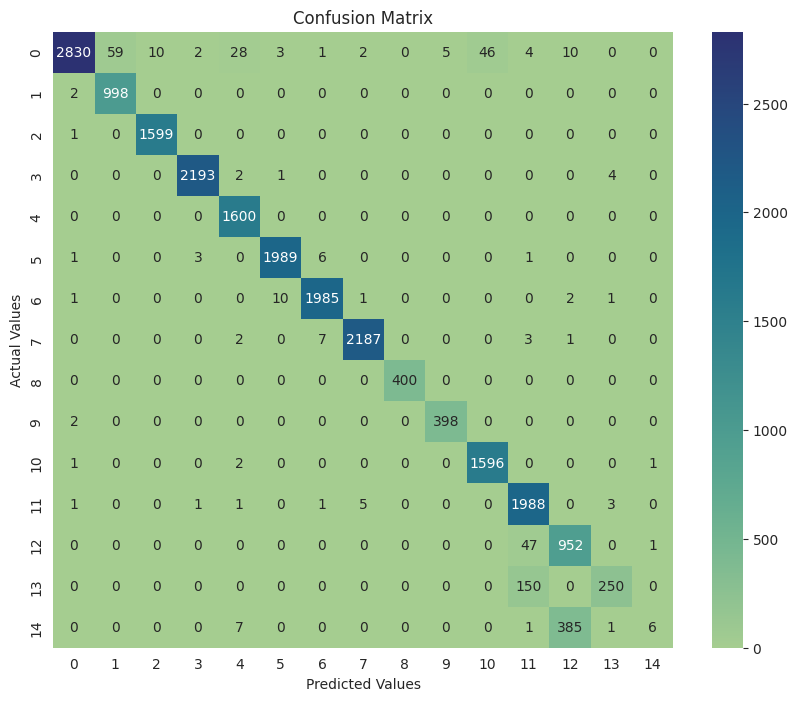

In [63]:
tmp=model.predict(x_test)

pred=[]
for i in range(0,len(tmp)):
    max=np.amax(tmp[i])
    for k in range(0,len(tmp[i])):
        if (tmp[i][k]==max):
            pred.append(k)     
preds=np.asarray(pred)

show_result(y_test,preds)

In [79]:
y_scores = np.exp(tmp) / np.sum(np.exp(tmp), axis=1, keepdims=True)

In [80]:
y_scores

array([[0.05982027, 0.05981609, 0.05981609, ..., 0.05981609, 0.05981609,
        0.05981609],
       [0.05982106, 0.16257945, 0.05981535, ..., 0.05981535, 0.05981535,
        0.05981535],
       [0.05981547, 0.05981483, 0.05981483, ..., 0.05981483, 0.05981483,
        0.05981483],
       ...,
       [0.05981476, 0.05981476, 0.16259338, ..., 0.05981476, 0.05981476,
        0.05981476],
       [0.06308861, 0.15559693, 0.06010018, ..., 0.06010085, 0.06010021,
        0.06010013],
       [0.05981476, 0.05981476, 0.05981476, ..., 0.05981476, 0.05981476,
        0.05981476]], dtype=float32)

In [67]:
f1_scores = f1_score(y_test, preds, labels=range(15), average=None)
macro_f1 = f1_score(y_test, preds, average='macro')
micro_f1 = f1_score(y_test, preds, average='micro')

In [68]:
f1_scores, macro_f1, micro_f1

(array([0.96934407, 0.97034516, 0.99657214, 0.99704478, 0.98704503,
        0.99375468, 0.9925    , 0.99522184, 1.        , 0.99128269,
        0.98457742, 0.94802098, 0.81021277, 0.75872534, 0.02941176]),
 0.8949372452670349,
 0.9619724770642202)

In [72]:
n_classes = 15
y_true_bin = label_binarize(y_test, classes=range(n_classes))

In [83]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

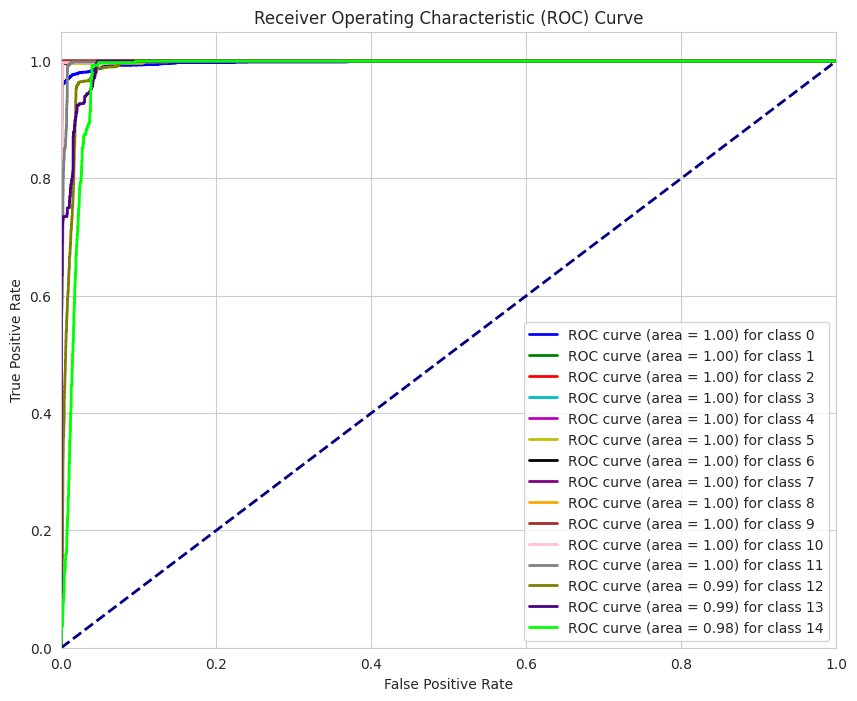

In [84]:
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'indigo', 'lime']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [77]:
tmp

array([[6.98143558e-05, 1.74946619e-13, 1.66141902e-15, ...,
        2.17607595e-16, 5.22487545e-24, 7.67183914e-15],
       [9.54947463e-05, 9.99904454e-01, 2.48628548e-14, ...,
        1.02540990e-12, 2.50423618e-15, 1.33541495e-14],
       [1.08806316e-05, 6.60306468e-26, 1.38574513e-21, ...,
        2.54594848e-13, 0.00000000e+00, 1.13670407e-14],
       ...,
       [6.78455076e-26, 0.00000000e+00, 9.99999940e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.85284925e-02, 9.51256990e-01, 1.05430081e-06, ...,
        1.20916256e-05, 1.53237136e-06, 1.83714235e-07],
       [1.82943955e-11, 2.43520276e-22, 3.72918228e-22, ...,
        9.22858207e-22, 1.74728010e-21, 2.61248644e-11]], dtype=float32)